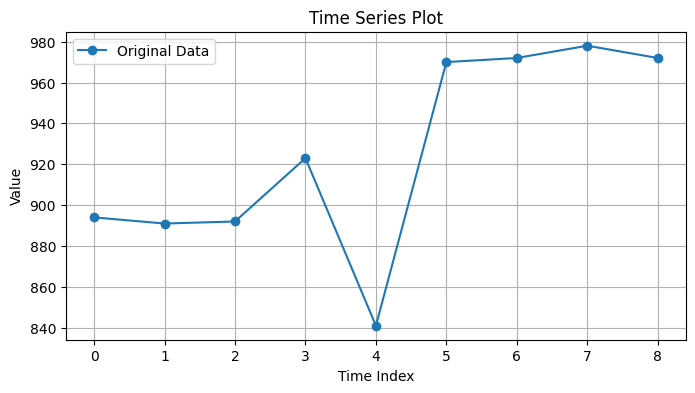

ADF Test Results:
ADF Statistic: -1.6415049041122256
p-value: 0.46147454519582753
Critical Value (1%): -4.6651863281249994
Critical Value (5%): -3.3671868750000002
Critical Value (10%): -2.802960625


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Data
data = [894, 891, 892, 923, 841, 970, 972, 978, 972]
series = pd.Series(data)

# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(series, marker='o', linestyle='-', label='Original Data')
plt.title('Time Series Plot')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Perform ADF test to check stationarity
adf_test = adfuller(series)
adf_result = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4]
}
print("ADF Test Results:")
print(f"ADF Statistic: {adf_result['ADF Statistic']}")
print(f"p-value: {adf_result['p-value']}")
for key, value in adf_result['Critical Values'].items():
    print(f"Critical Value ({key}): {value}")


In [ ]:
#The p-value is greater than 0.05, so we fail to reject the null hypothesis of the ADF test. This suggests that the data is not stationary.

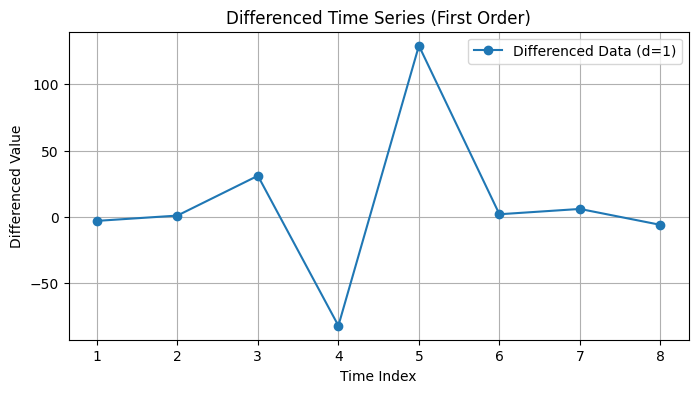

ADF Test Results for Differenced Data (d=1):
ADF Statistic: -4.401726956253137
p-value: 0.00029475066781218693
Critical Value (1%): -4.9386902332361515
Critical Value (5%): -3.477582857142857
Critical Value (10%): -2.8438679591836733


In [3]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# First-order differencing
diff_series = series.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(8, 4))
plt.plot(diff_series, marker='o', linestyle='-', label='Differenced Data (d=1)')
plt.title('Differenced Time Series (First Order)')
plt.xlabel('Time Index')
plt.ylabel('Differenced Value')
plt.legend()
plt.grid()
plt.show()

# Perform ADF test on differenced series
adf_test_diff = adfuller(diff_series)
adf_result_diff = {
    "ADF Statistic": adf_test_diff[0],
    "p-value": adf_test_diff[1],
    "Critical Values": adf_test_diff[4]
}

# Print ADF test results
print("ADF Test Results for Differenced Data (d=1):")
print(f"ADF Statistic: {adf_result_diff['ADF Statistic']}")
print(f"p-value: {adf_result_diff['p-value']}")
for key, value in adf_result_diff['Critical Values'].items():
    print(f"Critical Value ({key}): {value}")


In [ ]:
#The p-value is less than 0.05, so we reject the null hypothesis. The differenced data is now stationary.

In [ ]:
#We'll use the ACF and PACF plots to determine p (AR order) and q (MA order).

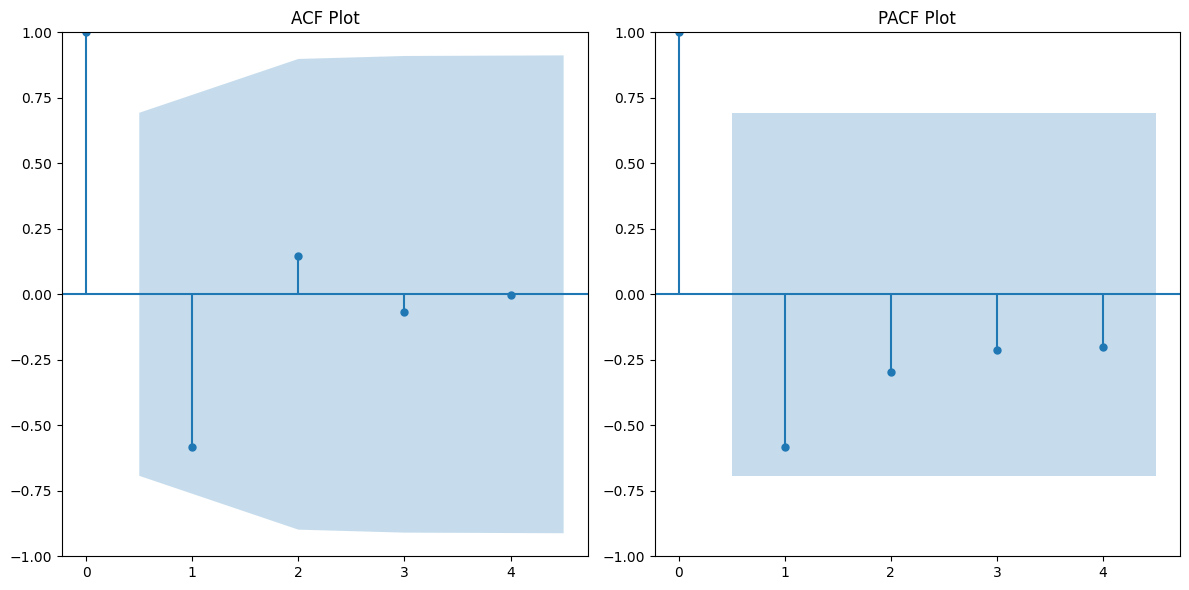

In [5]:
# Adjust the number of lags to fit the dataset size
max_lags = len(diff_series) // 2  # Ensure lags are < 50% of the dataset size

plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(diff_series, lags=max_lags, ax=plt.gca(), title='ACF Plot')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(diff_series, lags=max_lags, ax=plt.gca(), title='PACF Plot')

plt.tight_layout()
plt.show()


In [ ]:
#ACF drops off sharply after lag 1 → q=1.
#PACF drops off sharply after lag 1 → p=1.

In [ ]:
#p=1 (from PACF),
#d=1 (as we differenced the series to achieve stationarity),
#q=1 (from ACF).
#The recommended model is ARIMA(1, 1, 1).

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA(1, 1, 1) model
model = ARIMA(series, order=(1, 1, 1))
model_fit = model.fit()

# Print the summary of the fitted model
print(model_fit.summary())

# Generate forecasts for the next few periods (optional)
forecast = model_fit.forecast(steps=1)  # Forecast 3 future values
print("Forecasted Values:", forecast)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    9
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -42.236
Date:                Mon, 25 Nov 2024   AIC                             90.472
Time:                        19:28:44   BIC                             90.710
Sample:                             0   HQIC                            88.865
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3364      1.485     -0.227      0.821      -3.246       2.573
ma.L1         -0.1908      2.081     -0.092      0.927      -4.270       3.888
sigma2      2178.0689   1769.049      1.231      0.2